<a href="https://colab.research.google.com/github/anuravi98/fastai-notebooks/blob/master/pets1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt


In [0]:
path=untar_data(http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz);path

SyntaxError: ignored

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno=path/'annotations'
path_img=path/'images'

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'


In [0]:
fnames = get_image_files(path_img)

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224
                                  ).normalize(imagenet_stats)

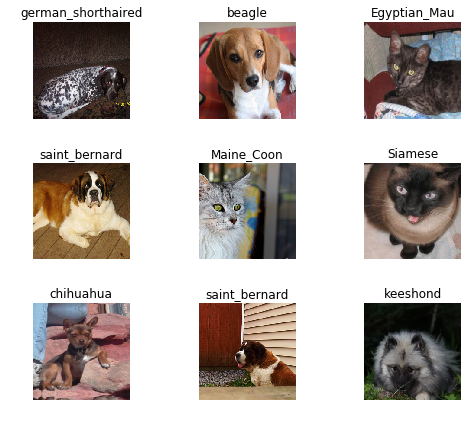

In [0]:
data.show_batch(rows=3, figsize=(7,6))


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 99225064.99it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.401292,0.314548,0.096752,01:21
1,0.560639,0.240865,0.074425,01:21
2,0.356006,0.216043,0.069689,01:19
3,0.266576,0.206277,0.069689,01:19


In [0]:
learn.save('stage-1')


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

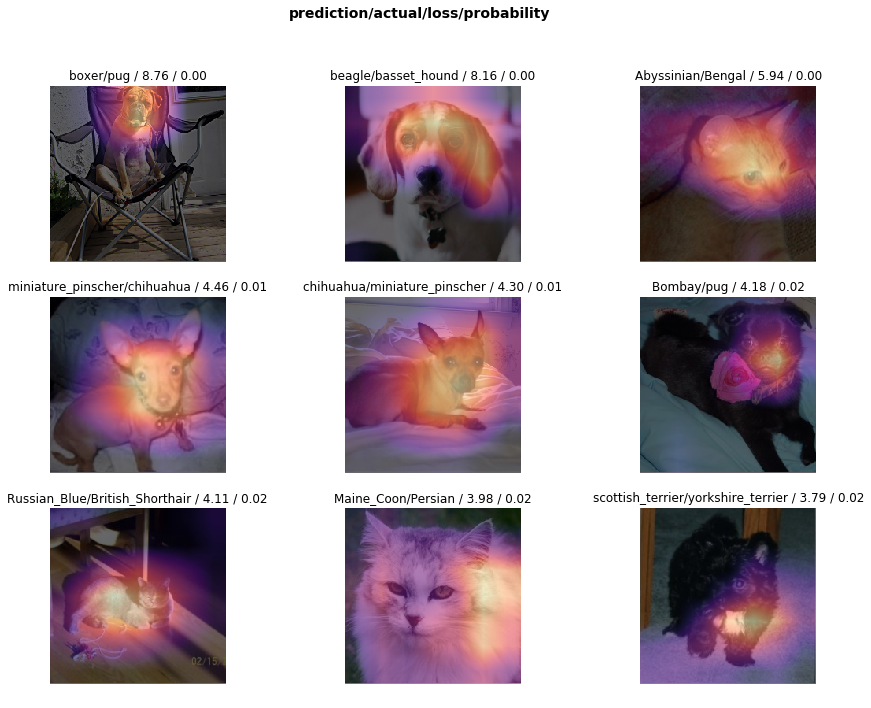

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

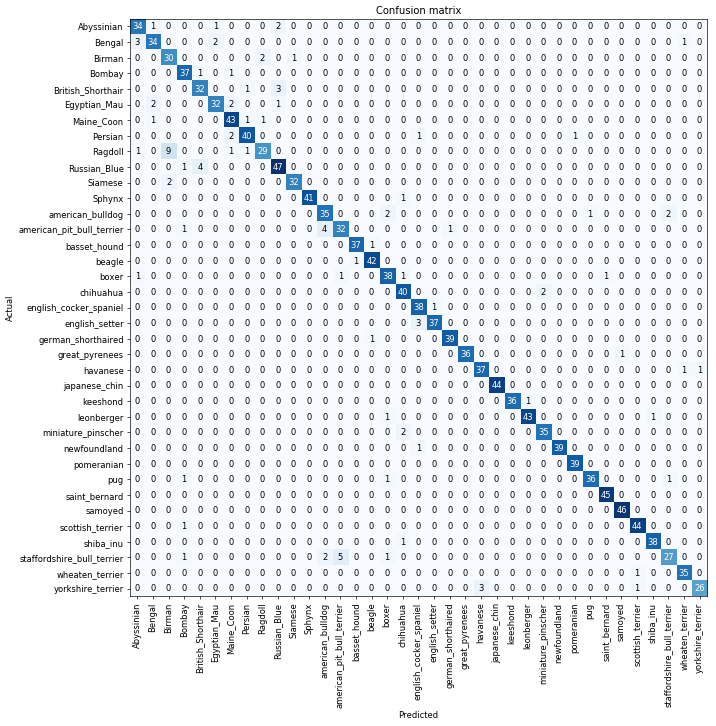

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 9),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Bengal', 'Abyssinian', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Abyssinian', 'Russian_Blue', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Egyptian_Mau', 'Maine_Coon', 2),
 ('Persian', 'Maine_Coon', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.unfreeze()


In [0]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.547233,0.355969,0.110961,01:24


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,Ragdoll,British_Shorthair,newfoundland,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Sphynx,english_setter,american_pit_bull_terrier,leonberger,British_Shorthair
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


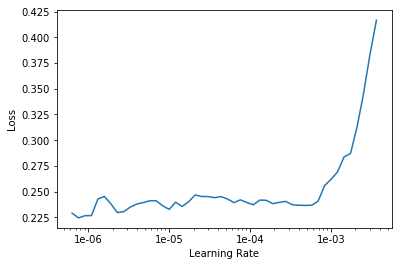

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.237242,0.204445,0.069012,01:21
1,0.225123,0.192784,0.066306,01:21
2,0.190631,0.187505,0.063599,01:22
3,0.180316,0.189245,0.064276,01:21


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'all-mias.tar'
downloaded = drive.CreateFile({'id': file_id})
